# KNN MODEL

#### LIBRARY IMPORT

In [33]:
import os
import cv2
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


#### DIRECTORY IMPORT

In [21]:

train_dir = 'C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\train\\'
test_dir= 'C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\test\\'

augmented_train_dir_all_in_one='C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\augmented_train_all_in_one'

if not os.path.exists(augmented_train_dir_all_in_one):
    os.makedirs(augmented_train_dir_all_in_one)
    


In [22]:
target_size=(256,256)

#### ALL IN ONE

In [23]:
def augmenter2(input_path, output_dir):
    image = cv2.imread(input_path)
    image = cv2.resize(image, target_size)  

    noisy_image = image.copy()
    rotated_image = image.copy()
    flipped_image = image.copy()

   
    noise = np.random.normal(0, 25, noisy_image.shape).astype(np.uint8)
    noisy_image = cv2.add(noisy_image, noise)


    angle = np.random.uniform(-15, 15)
    height, width = rotated_image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(rotated_image, rotation_matrix, (width, height))


    if np.random.rand() < 0.5:
        flipped_image = cv2.flip(flipped_image, 1)


    base_filename = os.path.splitext(os.path.basename(input_path))[0]

    cv2.imwrite(os.path.join(output_dir, f'{base_filename}_noisy_rotate_flip.jpg'), flipped_image)


labels = ['Covid', 'Normal']


for label in labels:
    train_dir_path = os.path.join(train_dir, label)
    aug_path = os.path.join(augmented_train_dir_all_in_one, label)
    if not os.path.exists(aug_path):
        os.makedirs(aug_path)
    for root, dirs, files in os.walk(train_dir_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(root, file)
                augmenter2(image_path, aug_path)


### image to vector form conversion function

##### ALL IN ONE

In [24]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
train_dir = augmented_train_dir_all_in_one


feature_vectors = []
labels = []

for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        image = cv2.imread(image_path)


        feature_vector = image.flatten()
        feature_vectors.append(feature_vector)
        labels.append(0 if label == 'Covid' else 1)

X_train = np.array(feature_vectors)
y_train = np.array(labels)

feature_vectors1 = []
labels1 = []

for label in os.listdir(test_dir):
    label_dir = os.path.join(test_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        image = cv2.imread(image_path)

        image = cv2.resize(image, target_size)

        feature_vector1 = image.flatten()
        feature_vectors1.append(feature_vector1)
        labels1.append(0 if label == 'Covid' else 1)

X_test = np.array(feature_vectors1)
y_test = np.array(labels1)




In [26]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### KNN MODEL TRANING


#### ALL IN ONE

##### k=3

In [27]:

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.93
Precision: 0.87
Recall: 1.00
F1 Score: 0.93


#### Finding the value of k resulting in the maximum accuracy

In [28]:

k_values = range(1, 100)  
k_accuracy_list = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    k_accuracy_list.append((k, accuracy))

k_accuracy_list.sort(key=lambda x: x[1], reverse=True)

for i in range(3):
    k, accuracy = k_accuracy_list[i]
    print(f"The {i+1}st best 'k' value is: {k}, with an accuracy of {accuracy}")


The 1st best 'k' value is: 1, with an accuracy of 0.9782608695652174
The 2st best 'k' value is: 2, with an accuracy of 0.9782608695652174
The 3st best 'k' value is: 6, with an accuracy of 0.9782608695652174


In [29]:
k_accuracy_list

[(1, 0.9782608695652174),
 (2, 0.9782608695652174),
 (6, 0.9782608695652174),
 (7, 0.9565217391304348),
 (8, 0.9565217391304348),
 (9, 0.9565217391304348),
 (10, 0.9565217391304348),
 (11, 0.9565217391304348),
 (12, 0.9565217391304348),
 (13, 0.9565217391304348),
 (14, 0.9565217391304348),
 (15, 0.9565217391304348),
 (16, 0.9565217391304348),
 (17, 0.9565217391304348),
 (18, 0.9565217391304348),
 (19, 0.9565217391304348),
 (20, 0.9565217391304348),
 (21, 0.9565217391304348),
 (23, 0.9565217391304348),
 (24, 0.9565217391304348),
 (25, 0.9565217391304348),
 (27, 0.9565217391304348),
 (28, 0.9565217391304348),
 (29, 0.9565217391304348),
 (62, 0.9565217391304348),
 (3, 0.9347826086956522),
 (4, 0.9347826086956522),
 (5, 0.9347826086956522),
 (22, 0.9347826086956522),
 (26, 0.9347826086956522),
 (30, 0.9347826086956522),
 (31, 0.9347826086956522),
 (32, 0.9347826086956522),
 (33, 0.9347826086956522),
 (34, 0.9347826086956522),
 (35, 0.9347826086956522),
 (36, 0.9347826086956522),
 (37, 0.93

In [31]:
from sklearn.metrics import confusion_matrix


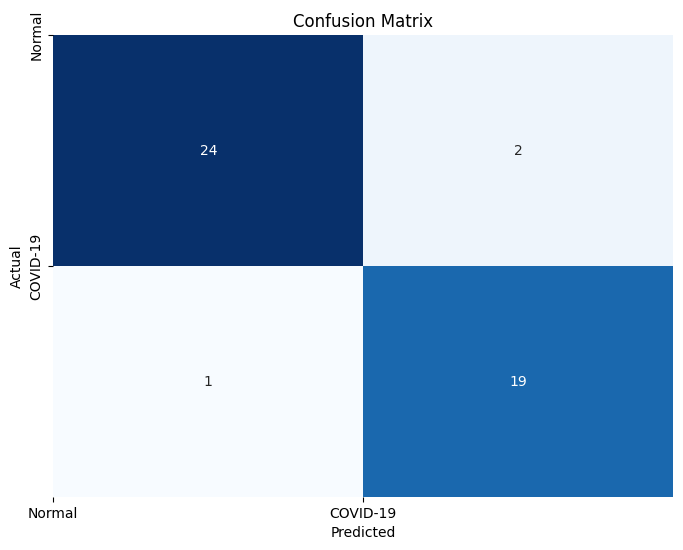

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Normal', 'COVID-19'])
plt.yticks([0, 1], ['Normal', 'COVID-19'])
plt.title('Confusion Matrix')
plt.show()
